In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
sns.set()

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

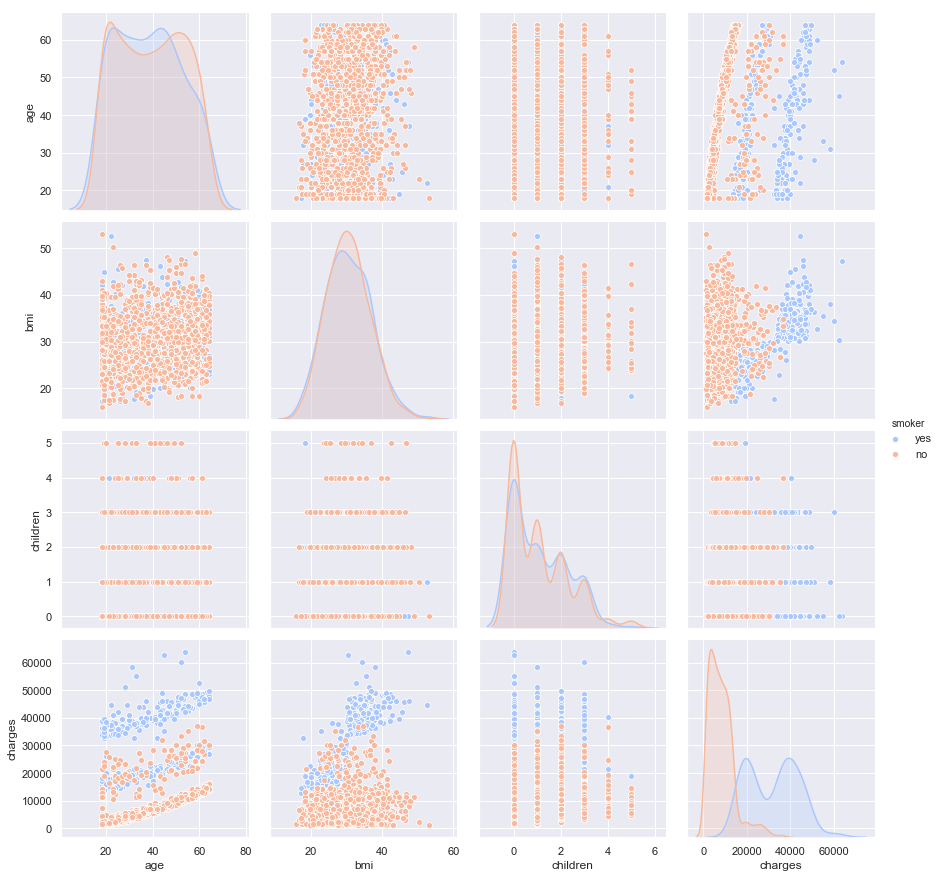

In [6]:
sns.pairplot(data, height=3,hue = "smoker", palette="coolwarm")

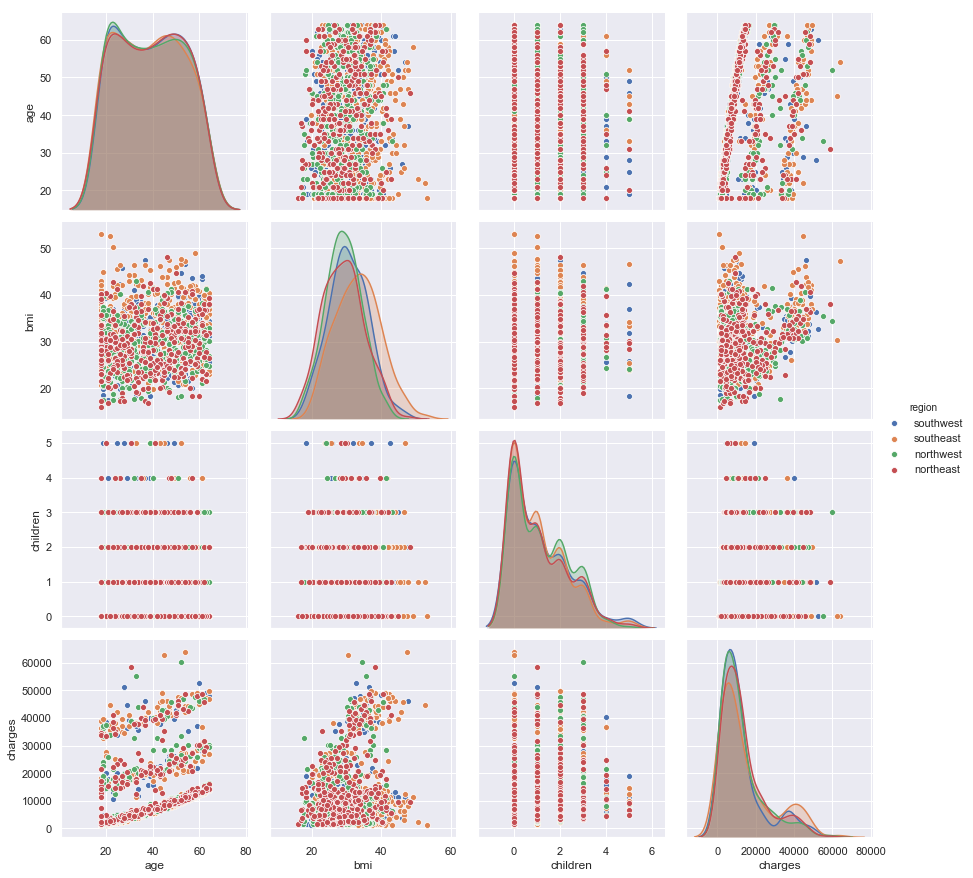

In [7]:
sns.pairplot(data, height=3,hue = "region")

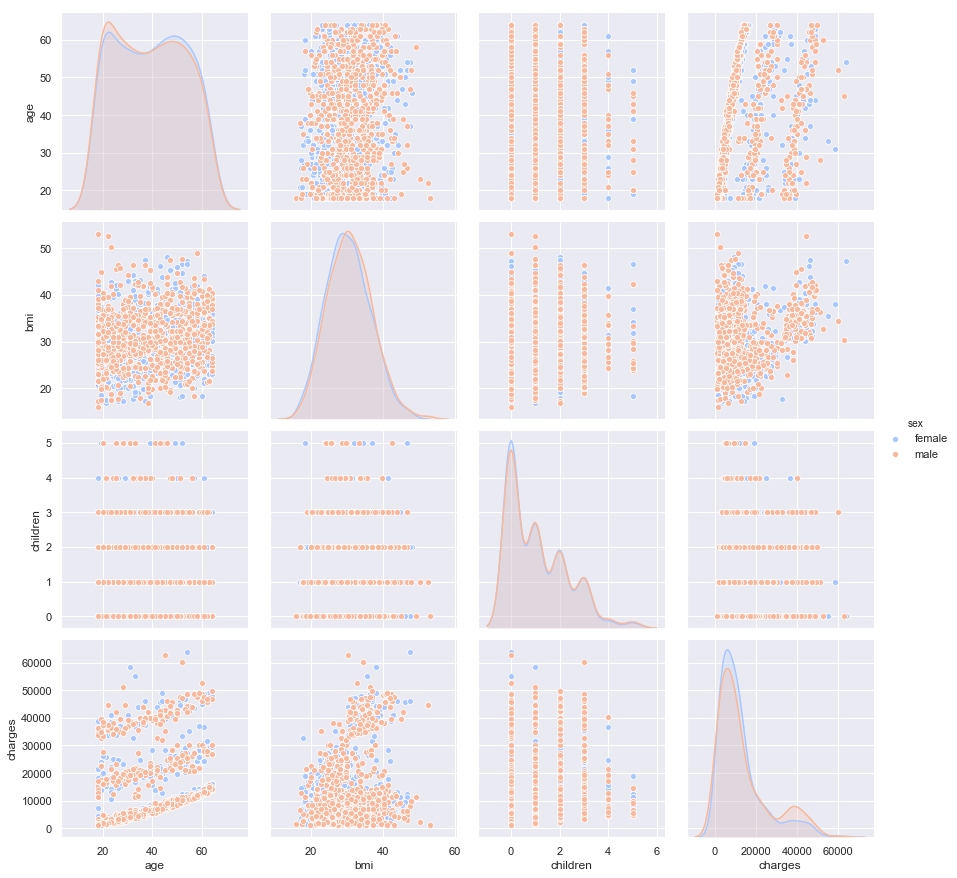

In [8]:
sns.pairplot(data, height=3,hue = "sex", palette="coolwarm")

In [9]:
# Encode the categorical columns
le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])

data = pd.get_dummies(data, columns = ['region'], drop_first = True)


In [10]:
# Create the variables
X = data.drop(['smoker'], axis=1)
y = data['smoker']

In [11]:
# Split into train and validation data
X_train,X_val,y_train,y_val = train_test_split(X, y, train_size=0.75, random_state=101)

C:\Users\MrAzuka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
# Fit the model 
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
# Predict the y values of the validation set
y_pred = rfc.predict(X_val)

In [14]:
# Check the accuracy using confusion matrix
cm = confusion_matrix(y_val,y_pred)
cm

array([[264,  12],
       [  1,  58]], dtype=int64)

In [15]:
# Check the accuracy using cross validation score
accuracy = cross_val_score(estimator = rfc , X = X_val, y = y_pred, cv = 100, verbose=5 );


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\MrAzuka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 70 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ..................................... , score=0.75, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.2s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] .

[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.8s finished


In [16]:
accuracy.mean()

0.9725